### Funcion: get_features_cat_classification

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de clasificación, es decir debe ser una variable categórica o numérica discreta pero con baja cardinalidad, un argumento "normalize" con valor False por defecto, una variable float "mi_threshold" cuyo valor por defecto será 0.

* En caso de que "normalize" sea False:
    La función debe devolver una lista con las columnas categóricas del dataframe cuyo valor de mutual information con 'target_col' iguale o supere el valor de "mi_threshold".

* En caso de que "normalize" sea True:
    La función debe devolver una lista con las columnas categóricas del dataframe cuyo valor normalizado de mutual information con 'target_col' iguale o supere el valor de "mi_threshold". El valor normalizado de mutual information se considera el obtenido de dividir el valor de mutual information tal cual ofrece sklearn o la fórmula de cálculo por la suma de todos los valores de mutual information de las features categóricas del dataframe.
    En este caso, la función debe comprobar que "mi_threshold" es un valor float entre 0 y 1, y arrojar un error si no lo es.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable categórica del dataframe.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/titanic.csv")
df = df.drop(["alive","age", "embark_town", "embarked", "deck"], axis=1)
target_col = "survived"
df.info()

FileNotFoundError: [Errno 2] No such file or directory: './data/titanic.csv'

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

def get_features_cat_classification(df, target_col, normalize=False, mi_threshold=0):
    # Comprobar si 'target_col' es una columna del DataFrame
    if target_col not in df.columns:
        print(f"Error: '{target_col}' no es una columna válida en el DataFrame.")
        return None

    # Comprobar si 'target_col' es una variable categórica
    if not pd.api.types.is_categorical_dtype(df[target_col]) and not pd.api.types.is_object_dtype(df[target_col]):
        print(f"Error: '{target_col}' no es una variable categórica en el DataFrame.")
        return None

    # Comprobar si 'mi_threshold' es un valor float entre 0 y 1
    if not isinstance(mi_threshold, float) or mi_threshold < 0 or mi_threshold > 1:
        print("Error: 'mi_threshold' debe ser un valor float entre 0 y 1.")
        return None

    # Comprobar si 'normalize' es un booleano
    if not isinstance(normalize, bool):
        print("Error: 'normalize' debe ser un valor booleano (True/False).")
        return None

    # Copiar el DataFrame para evitar modificar el original
    df_copy = df.copy()

    # Excluir la columna objetivo antes de aplicar la codificación one-hot
    if target_col in df_copy.columns:
        df_copy.drop(columns=[target_col], inplace=True)

    # Obtener las columnas categóricas del DataFrame
    categorical_cols = [col for col in df_copy.columns if df_copy[col].nunique() < 20]

    # Eliminar columnas que no son categóricas
    for col in df_copy:
        if col not in categorical_cols:
            df_copy.drop(columns=[col], inplace=True)

    # Si hay columnas categóricas no numéricas, aplicar codificación one-hot
    if categorical_cols:
        df_copy = pd.get_dummies(df_copy, columns=categorical_cols)

    # Obtener las características después de eliminar filas con valores faltantes
    X = df_copy

    # Obtener la variable objetivo después de eliminar filas con valores faltantes
    y = df[target_col].iloc[df_copy.index]

    selected_features = []

    for col in X.columns:
        # Calcula la información mutua entre la columna actual y la variable objetivo
        mi_score = mutual_info_classif(X[[col]], y)[0]

        # Si se solicita normalización, normaliza el puntaje de información mutua
        if normalize:
            mi_scores_sum = sum(mutual_info_classif(X[[col]], y) for col in X.columns)
            if mi_scores_sum == 0:
                print("Error: La suma de los puntajes de información mutua es cero, no se puede normalizar.")
                return None
            mi_score /= mi_scores_sum

        # Si el puntaje de información mutua supera el umbral especificado, agrega la columna a las seleccionadas
        if mi_score >= mi_threshold:
            selected_features.append(col)

    return selected_features


'''Definitiva creo que esta funciona'''

'Definitiva creo que esta funciona'

In [ ]:
get_features_cat_classification(df, target_col, normalize=False, mi_threshold=0.1)

C:\Users\Nur\AppData\Local\Temp\ipykernel_2336\3386120233.py:11: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[target_col]) and not pd.api.types.is_object_dtype(df[target_col]):


['survived_0',
 'survived_1',
 'sex_female',
 'sex_male',
 'who_man',
 'who_woman',
 'adult_male_False',
 'adult_male_True']

### Funcion: plot_features_cat_classification

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("mi_threshold") con valor 0.0 por defecto, y un argumento "normalize" a False.

Si la lista no está vacía:
* La función seleccionara de esta lista los valores que correspondan a columnas o features categóricas del dataframe cuyo valor de mutual information respecto de target_col supere el umbral puesto en "mi_threshold" (con las mismas considereciones respecto a "normalize" que se comentan en la descripción de la función "get_features_cat_classification").
* Para los valores seleccionados, pintará la distribución de etiquetas de cada valor respecto a los valores de la columna "target_col".

Si la lista está vacía:
* Entonces la función igualará "columns" a las variables categóricas del dataframe y se comportará como se describe en la sección "Si la lista no está vacía"

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_classification`.

In [ ]:
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score
import matplotlib.pyplot as plt 
import seaborn as sns

normalized_mutual_info_score(df["survived"], df["survived"])

1.0

In [ ]:
mutual_info_score(df["survived"], df["survived"])

0.6659119735267651

In [ ]:
def plot_features_cat_classification(df, target_col = "", columns = [], mi_threshold=0.0, normalize=False):
    if not columns:
        columns = [col for col in df.columns if df[col].nunique() < 20 and col != target_col]
        
    if not normalize:
        mutual_info = mutual_info_score
    else:
        mutual_info = normalized_mutual_info_score

    para_pintar = []
    for col in columns:
        mis = mutual_info(df[target_col], df[col])
        if mis >= mi_threshold:
            para_pintar.append(col)

    # momento pintar
    num_cols = len(para_pintar)
    num_subplots_per_row = 2
    num_rows = (num_cols + num_subplots_per_row - 1) // num_subplots_per_row

    fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(12, num_rows * 5))

    for i, col in enumerate(para_pintar):
        row = i // num_subplots_per_row
        col_index = i % num_subplots_per_row
        ax = axes[row, col_index]
        
        sns.countplot(x=col, hue='survived', data=df, ax=ax)
        ax.set_title(f'Distribución de {target_col} por {col}')
        ax.set_xlabel(col)

    # Oculta los subplots vacíos si hay menos columnas que subplots por fila
    for i in range(num_cols, num_rows * num_subplots_per_row):
        axes.flatten()[i].axis('off')

    plt.tight_layout()
    plt.show()

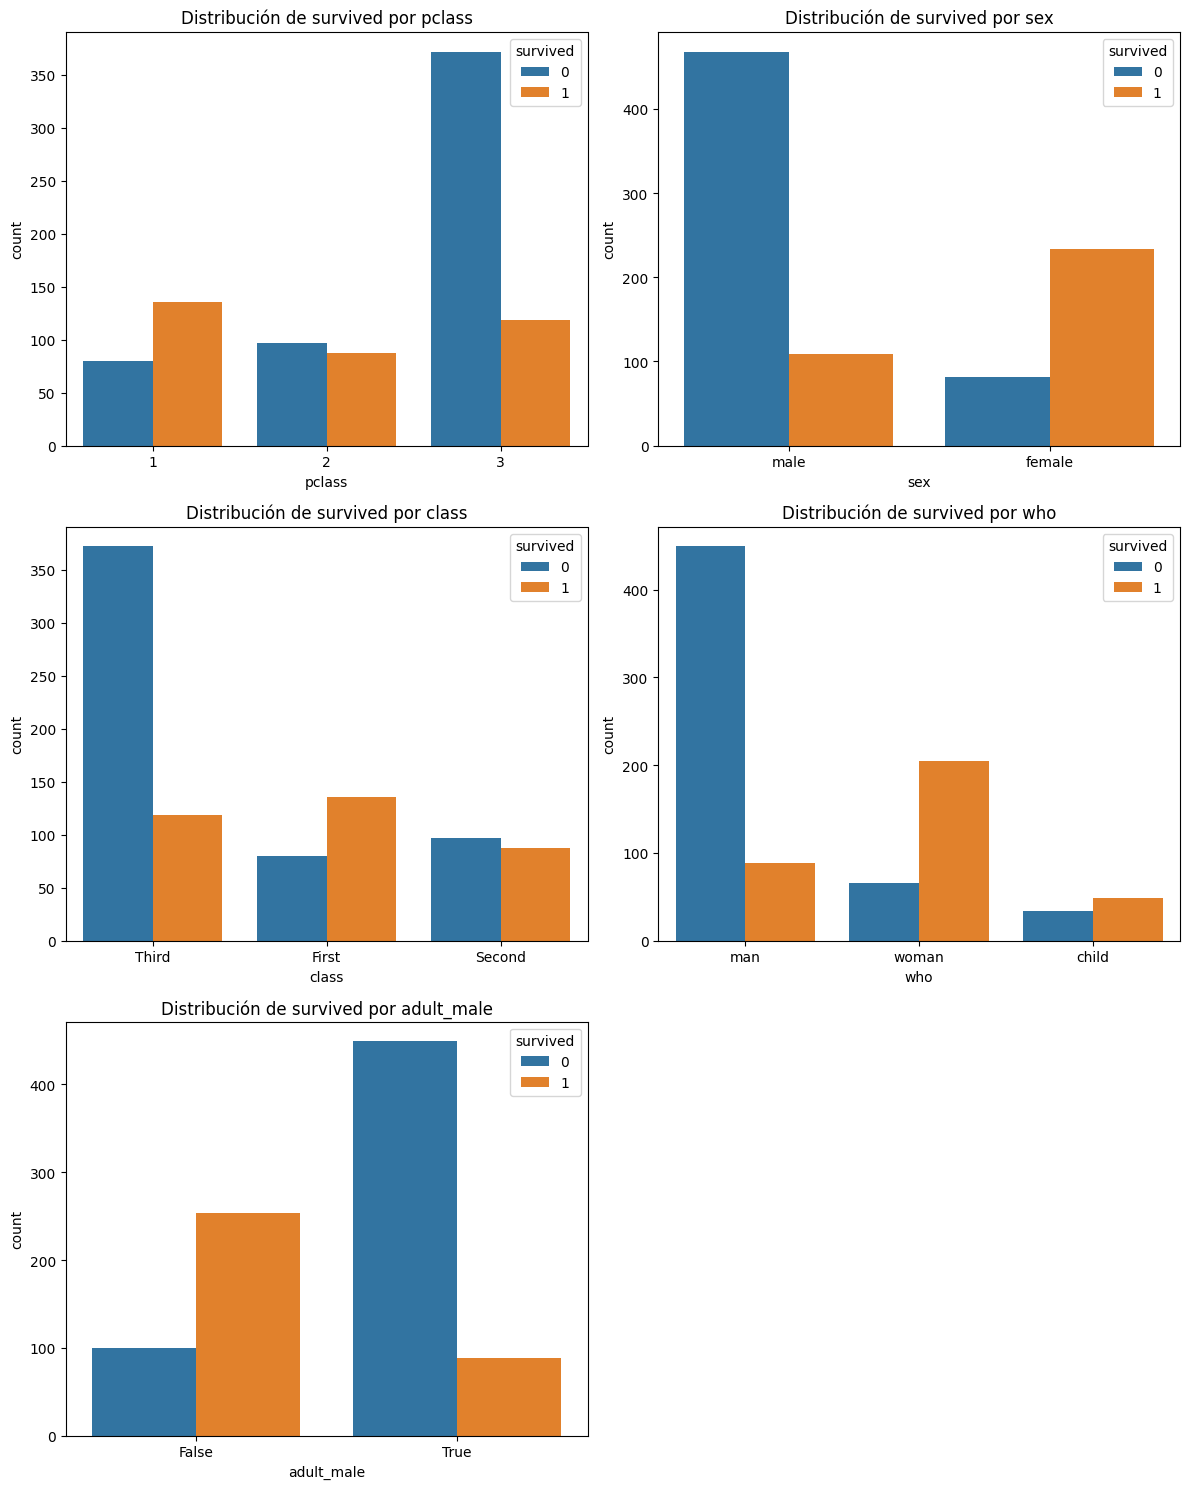

In [ ]:
plot_features_cat_classification(df, "survived", mi_threshold=0.05)

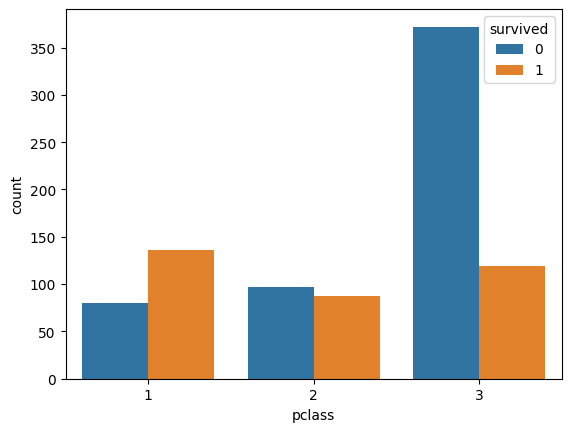

In [ ]:
para_pintar = [
 'pclass',
 'sibsp',
 'parch',
 'class',
 'who',
 'adult_male',
 'alone']

sns.countplot(x="pclass", hue='survived', data=df)
plt.show()

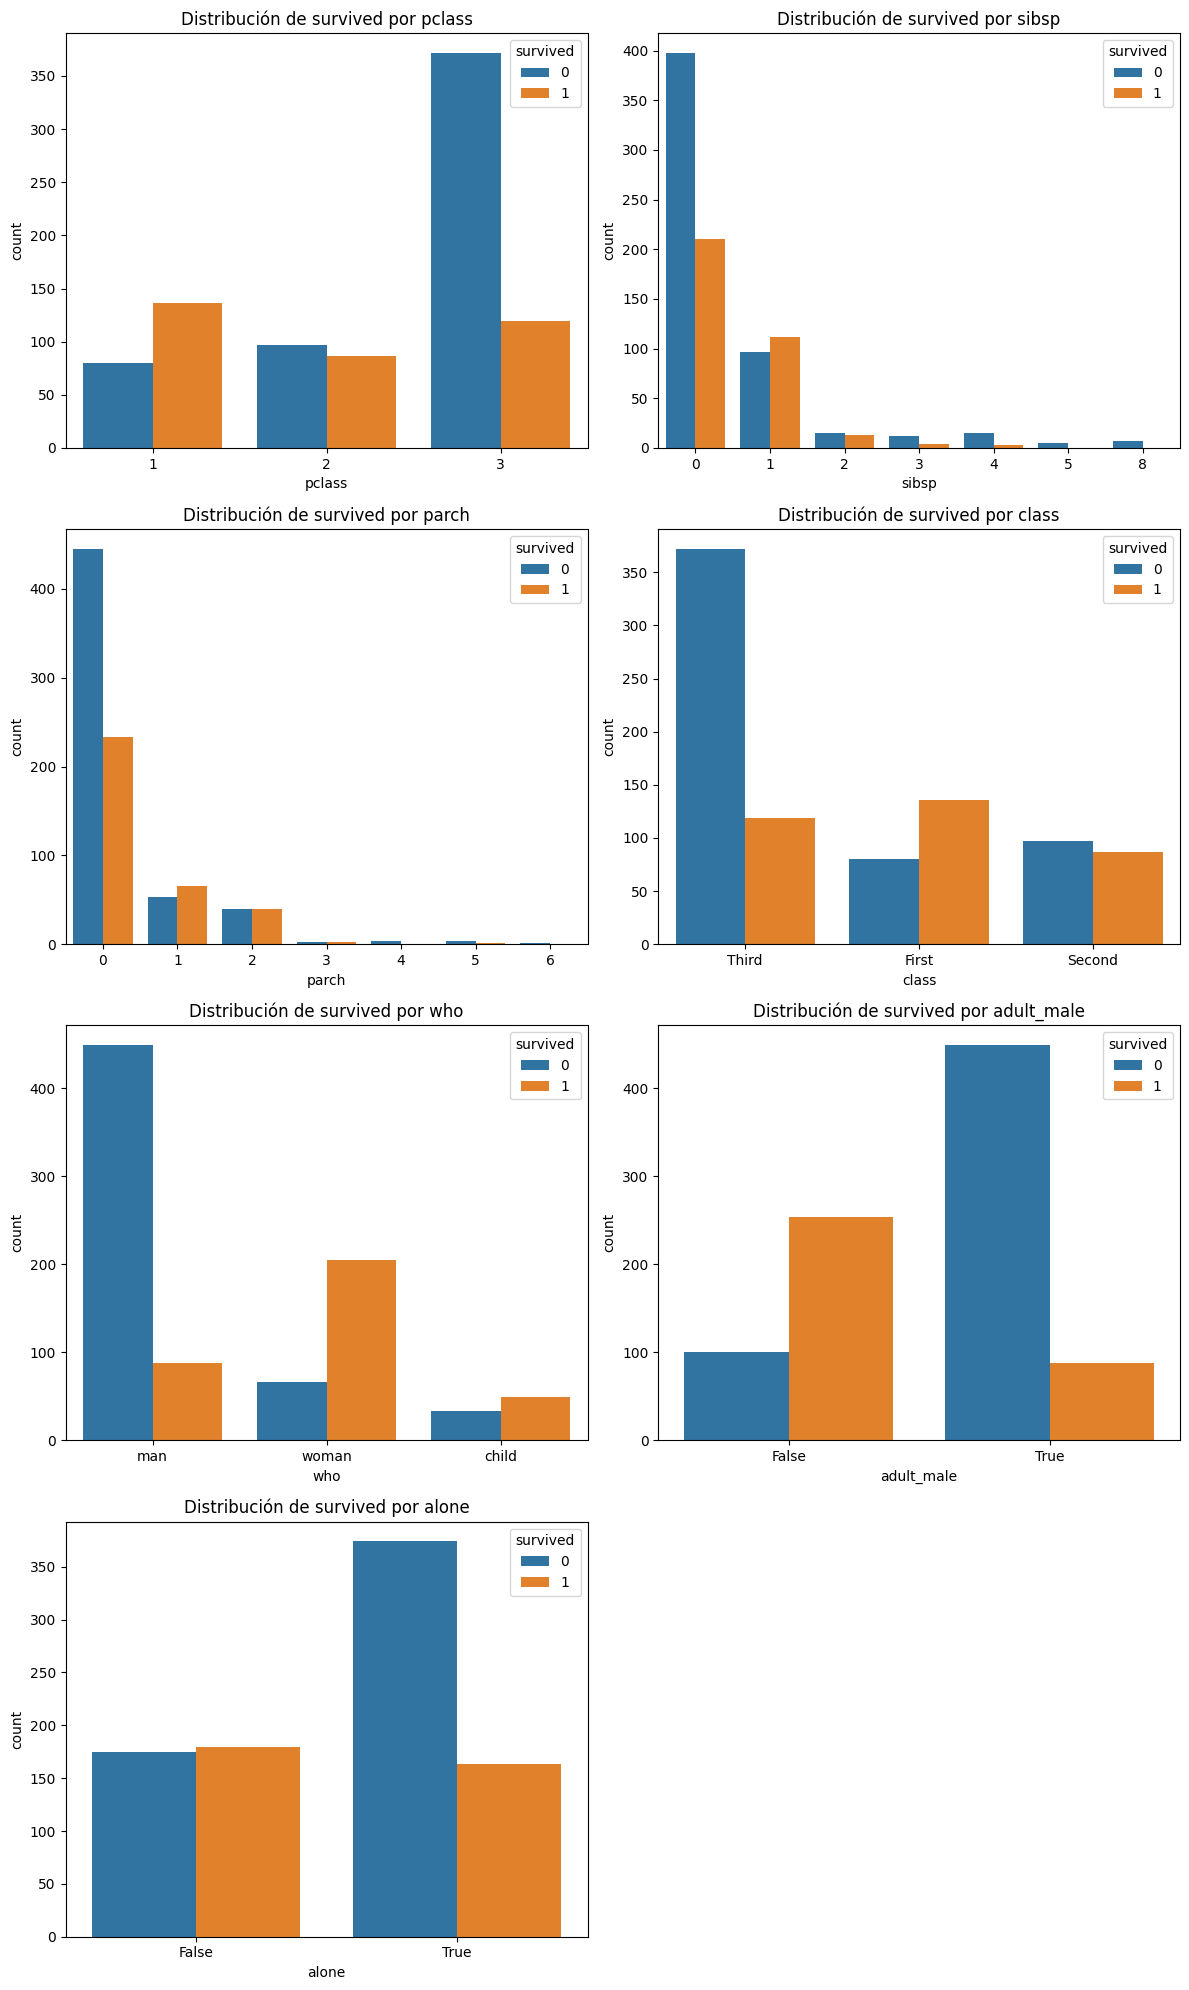

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'para_pintar' contiene las columnas que deseas visualizar y 'df' es tu DataFrame
num_cols = len(para_pintar)
num_subplots_per_row = 2
num_rows = (num_cols + num_subplots_per_row - 1) // num_subplots_per_row

fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(12, num_rows * 5))

for i, col in enumerate(para_pintar):
    row = i // num_subplots_per_row
    col_index = i % num_subplots_per_row
    ax = axes[row, col_index]
    
    sns.countplot(x=col, hue='survived', data=df, ax=ax)
    ax.set_title(f'Distribución de {target_col} por {col}')
    ax.set_xlabel(col)

# Oculta los subplots vacíos si hay menos columnas que subplots por fila
for i in range(num_cols, num_rows * num_subplots_per_row):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()
